# Importing Datas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [2]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df.head(9)

,age,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,Female,0,1,never,25.19,6.6,140,0
1,54.0,Female,0,0,No Info,27.32,6.6,80,0
2,28.0,Male,0,0,never,27.32,5.7,158,0
3,36.0,Female,0,0,current,23.45,5.0,155,0
4,76.0,Male,1,1,current,20.14,4.8,155,0
5,20.0,Female,0,0,never,27.32,6.6,85,0
6,44.0,Female,0,0,never,19.31,6.5,200,1
7,79.0,Female,0,0,No Info,23.86,5.7,85,0
8,42.0,Male,0,0,never,33.64,4.8,145,0


In [3]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [4]:
# Checking Unique datas in each features.
print(df['hypertension'].unique())
print(df['gender'].unique())
print(df['heart_disease'].unique())
print(df['smoking_history'].unique())
print(df['bmi'].unique())
print(df['HbA1c_level'].unique())
print(df['blood_glucose_level'].unique())

[0 1]
['Female' 'Male' 'Other']
[1 0]
['never' 'No Info' 'current' 'former' 'ever' 'not current']
[25.19 27.32 23.45 ... 59.42 44.39 60.52]
[6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
[140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]


# EDA dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   gender               100000 non-null  object 
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.columns

Index(['age', 'gender', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [8]:
# Checking null values
df.isnull().sum()

age                    0
gender                 0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
# Checking duplicates
df.duplicated().sum()

np.int64(3854)

In [10]:
# Removing Duplicate Data
df=df.drop_duplicates()

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.dtypes

age                    float64
gender                  object
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [13]:
# Quantitative data means numerical datas
categorical_data=['gender','smoking_history']
for x in categorical_data:
    quantitive_data=df.drop(columns={x})

# Pre-Processing

In [14]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [15]:
# Encoding the categorical data as machine can only be train with numeric datas.
smk_hist={'current': 0,
                'ever': 1,
                'former':2,
                'never': 3,
                'No Info':4,
                'not current': 5}

df['gender']=df['gender'].map({'Male':1,'Female':0})
df['smoking_history']=df['smoking_history'].map(smk_hist)

In [16]:
df.head()

,age,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0.0,0,1,3,25.19,6.6,140,0
1,54.0,0.0,0,0,4,27.32,6.6,80,0
2,28.0,1.0,0,0,3,27.32,5.7,158,0
3,36.0,0.0,0,0,0,23.45,5.0,155,0
4,76.0,1.0,1,1,0,20.14,4.8,155,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  96146 non-null  float64
 1   gender               96128 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int64  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 7.3 MB


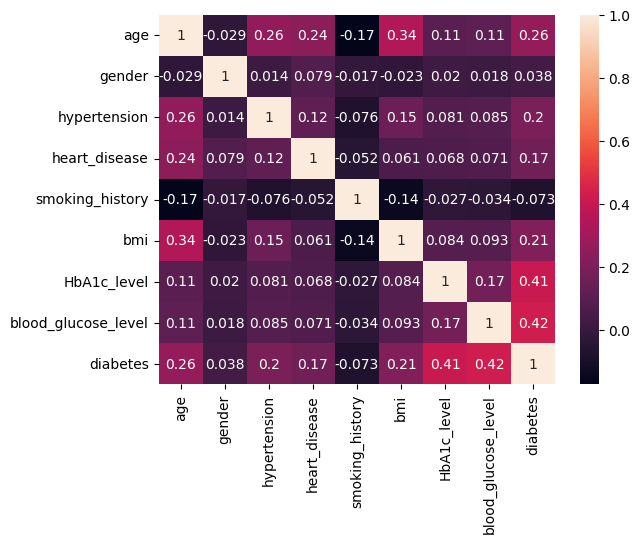

In [18]:
# plotting heatmap to see correlation between features
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [19]:
# As we can see diabetes is mostly affected by blood glucose level and HbA1c Level.

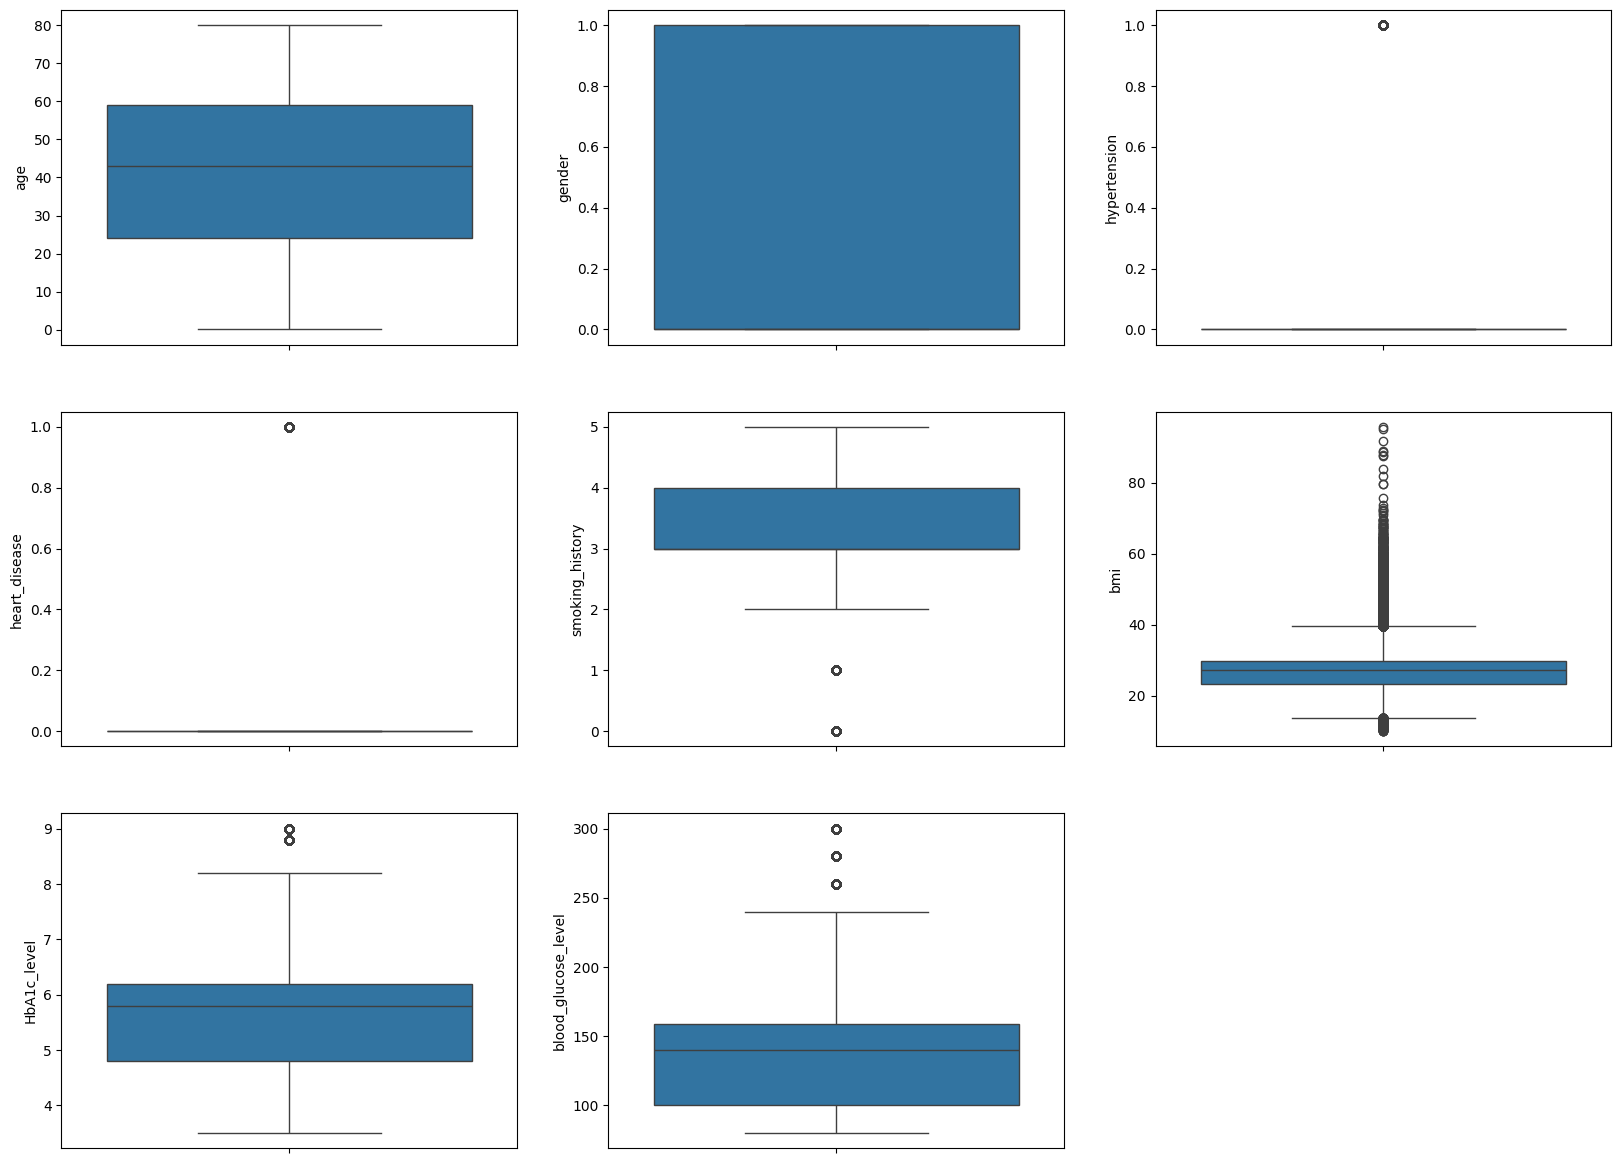

In [20]:
# Cheking if our data contains outliers.
x=df.drop(columns={'diabetes'})
y=df['diabetes']
# Checking Outliers
j=1
plt.figure(figsize=(20,20))
for i in x:
    plt.subplot(4,3,j)
    sns.boxplot(y=i,data=df)
    plt.xticks(rotation=90)
    j+=1
plt.show()

In [21]:
features=df.drop(columns={'diabetes','hypertension','heart_disease'},axis=1)

In [22]:
# capping to outliers to remove them.
def cap_outliers(df,columns):
    q1=df[columns].quantile(0.25)
    q3=df[columns].quantile(0.75)
    IQR=q3-q1
    lb=q1-1.5*IQR
    ub=q3+1.5*IQR
    df[columns]=df[columns].apply(lambda a : lb if a<lb else ub if a>ub else a)
    return df
for column in features:
    df=cap_outliers(df,column)

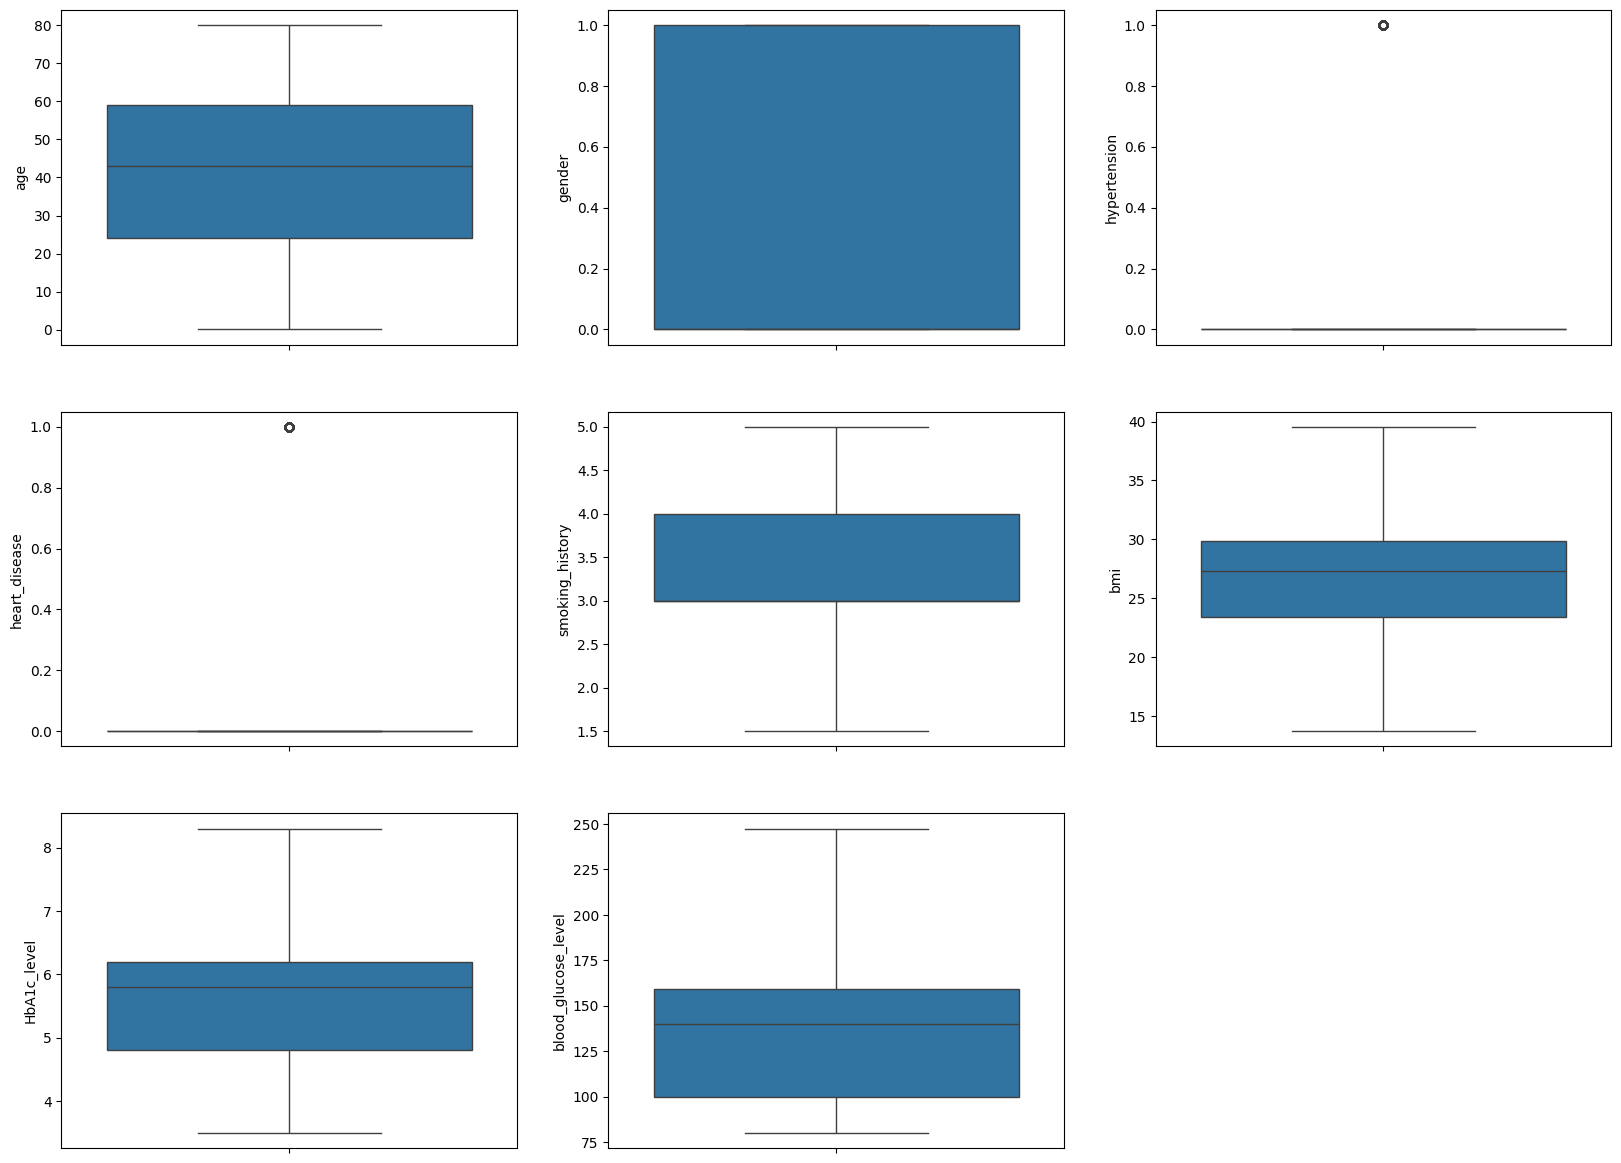

In [23]:
# box plot to check if any outliers remains
j=1
plt.figure(figsize=(20,20))
for i in x:
    plt.subplot(4,3,j)
    sns.boxplot(y=i,data=df)
    plt.xticks(rotation=90)
    j+=1
plt.show()

In [24]:
# Checking size of df after removing outliers
df.shape

(96146, 9)

In [25]:
# Spliting the data set into 2 parts , test data ana
from sklearn.model_selection import train_test_split
x=df.drop(columns={'diabetes'})
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42) 
# as our data contains 10% diabetic and 90 % non-diabetic so while splitting data there may
#  be imbalance such as x_train may contain all non diabetic and only 1 diabetic data. 
# so if we use stratify=y it will split data such that diabetic is 10% and non diabetic is 90%

In [26]:
x_train.shape

(76916, 8)

In [27]:
y_test.shape

(19230,)

In [28]:
y_train.value_counts()

diabetes
0    70130
1     6786
Name: count, dtype: int64

In [29]:
from manual_xgboost import XGBoostClassifierManual

In [30]:
print(x_train.shape, y_train.shape)


(76916, 8) (76916,)


In [31]:
model = XGBoostClassifierManual(n_estimators=50, learning_rate=0.1, max_depth=3)
model.fit(x_train,y_train)

In [33]:
y_pred=model.predict(x_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18080
           1       0.68      1.00      0.81      1150

    accuracy                           0.97     19230
   macro avg       0.84      0.98      0.90     19230
weighted avg       0.98      0.97      0.97     19230



In [36]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(19230,))

In [32]:
# Joblib is used for creating a joblib file which is used in django to predict user inputed data.
import joblib
joblib.dump(model,'Diabetes_Predictor.joblib')
model=joblib.load('Diabetes_Predictor.joblib')